1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

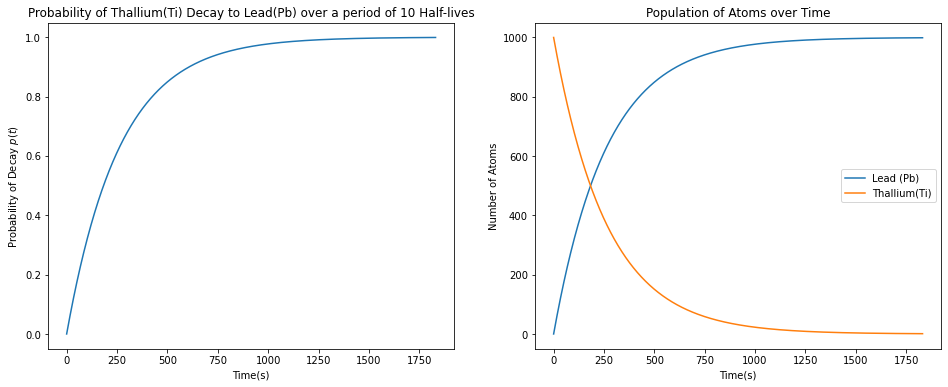

In [2]:
tau0 = 3.052 * 60 # half-life in seconds
ti_sample = 1000 #Thallium atoms
pb_sample = 0 # Lead atoms

def decay_prob(t, tau):
    return 1 - 2**(-t/tau)

time = np.linspace(0,round(tau0*10), round(tau0*10)+1) #time steps of 1 for 10 half-lives
decay_vector = [decay_prob(t,tau0) for t in time]

pop_pb = np.array(decay_vector)*1000
pop_ti = abs(pop_pb - 1000)


fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
ax1.plot(time,decay_vector)
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Probability of Decay $p(t)$')
ax1.set_title('Probability of Thallium(Ti) Decay to Lead(Pb) over a period of 10 Half-lives')

ax2.plot(time,pop_pb, label = 'Lead (Pb)')
ax2.plot(time,pop_ti, label = 'Thallium(Ti)')
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Number of Atoms')
ax2.set_title('Population of Atoms over Time')
ax2.legend()

plt.show()

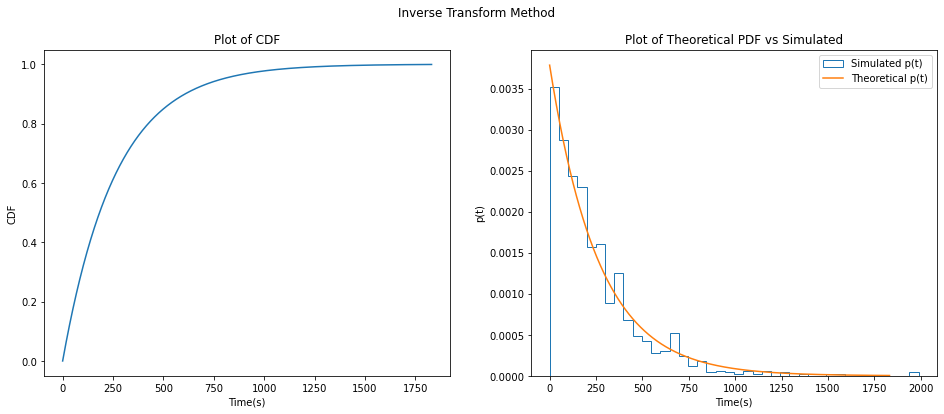

In [3]:
# probability distribution
def pdf(t, tau):
    return (np.log(2)/tau) * 2**(-t/tau)

#obtained by integrating the pdf and taking the inverse of the function
def cdf(t, tau):
    return (1 - 2**(-t/tau))

def decay_icdf(y, tau):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -tau*np.log2(1-y)

# plot CDF
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
fig.suptitle('Inverse Transform Method')
ax1.plot(time, cdf(time, tau0))
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('CDF')
ax1.set_title('Plot of CDF')


y_rand = np.random.random(1000)
rand_time = decay_icdf(y_rand,tau0) # apply the inverse of the CDF

ax2.hist(rand_time, histtype='step', bins=40, density=True, linewidth=1, label='Simulated p(t)')
ax2.plot(time, pdf(time, tau0), label = 'Theoretical p(t)')
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('p(t)')
ax2.set_title('Plot of Theoretical PDF vs Simulated')
ax2.legend()
plt.show()

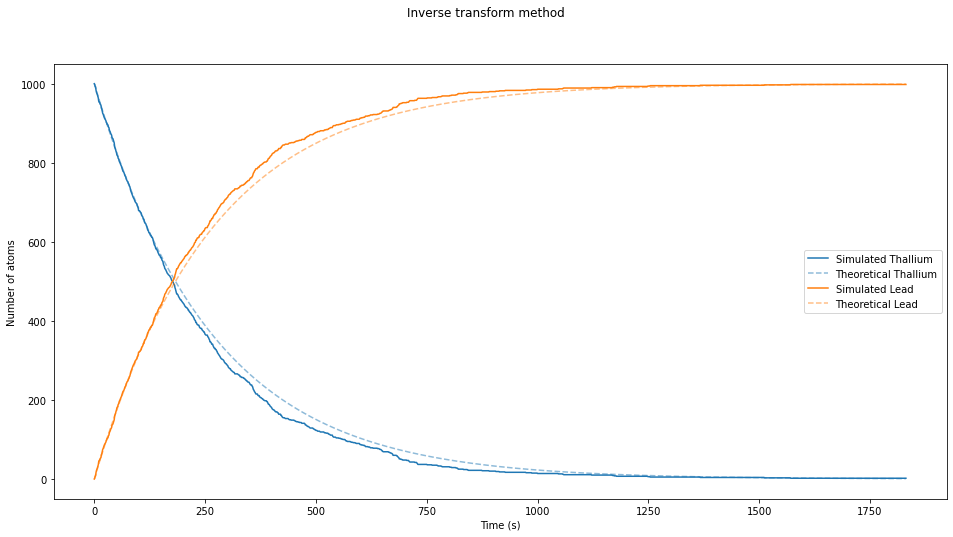

In [4]:
# calculate number of atoms remaining at each time step

tl_count = []
pb_count = []

for t in time:
    tl_temp = 0
    for tr in rand_time:
        #if the simulated decay time is greater than the actual time then the atom has not decayed
        if tr>t:
            tl_temp = tl_temp + 1
    tl_count.append(tl_temp)
    pb_count.append(1000-tl_temp)  
    
# plot Tl and Pb simulated and theoretical number of atoms over time
fig,ax = plt.subplots(1,1, figsize = (16,8))
fig.suptitle(r'Inverse transform method')
ax.plot(time, tl_count, label='Simulated Thallium')
ax.plot(time, pop_ti, 'C0--', alpha=0.5, label='Theoretical Thallium')
ax.plot(time, pb_count, label='Simulated Lead')
ax.plot(time, pop_pb, 'C1--', alpha=0.5, label='Theoretical Lead')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of atoms')
ax.legend()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

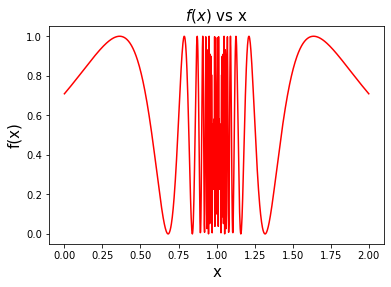

In [5]:
def f(x):
    return np.sin(1/(1-x))**2

N = 100000

x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'r-')
plt.xlabel('x',fontsize = 15)
plt.ylabel('f(x)',fontsize = 15)
plt.title('$f(x)$ vs x',fontsize = 15)
plt.show()

In [6]:
def hit_miss_method(N):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    I = 2 * count / N # 2 --> range diff 0,2
    return I


print("Value of the Integral using the hit and miss method:", hit_miss_method(N))

Value of the Integral using the hit and miss method: 1.34782


In [7]:
repeat_count = 20

integrals_hm = np.array([hit_miss_method(N) for i in range(0,repeat_count)])

# Mean and std of the integral values calculated
mean_hm = np.mean(integrals_hm)
std_hm = np.std(integrals_hm)

print('\nMean Value of the integrals:',mean_hm)
print('\nStd Value of the integrals:',std_hm)


Mean Value of the integrals: 1.3474030000000001

Std Value of the integrals: 0.002758501586006426


In [8]:
def mean_value_method(N):
    x = 2 * np.random.random(N) # x is random uniform between 0 and 2
    return np.sum([f(i) for i in x])*2/N

print("Value of the Integral using the mean value method:", mean_value_method(N))

Value of the Integral using the mean value method: 1.3481970108915018


In [9]:
repeat_count = 20

integrals_mv = np.array([mean_value_method(N) for i in range(0,repeat_count)])

# Mean and std of the integral values calculated
mean_mv = np.mean(integrals_mv)
std_mv = np.std(integrals_mv)

print('\nMean Value of the integrals:',mean_mv)
print('\nStd Value of the integrals:',std_mv)


Mean Value of the integrals: 1.3463311477486548

Std Value of the integrals: 0.0026013149056670526


In [10]:
print('\nThe Integral Value using the hit-miss method is %f with a error of %f'%(mean_hm,std_hm))
print('\nThe Integral Value using the mean-value method is %f with a error of %f'%(mean_mv,std_mv))


The Integral Value using the hit-miss method is 1.347403 with a error of 0.002759

The Integral Value using the mean-value method is 1.346331 with a error of 0.002601


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [11]:
N = 100000

np.random.seed(1234)

def func(param):
    res = 0
    for p in param: 
        res += p**2
    if (res <= 1):
        return 1
    else:
        return 0
    
# Monte Carlo integration for 2D Circle

def integral_2d(N):
    count = 0
    dim = 2
    for i in range(N):
        x = np.random.random() 
        y = np.random.random()     
        if func([x,y]) == 1:
            count += 1
    I = 2**dim * count / N
    return I

print("Integral using the Hit/Miss method:", integral_2d(N)) 


# Monte Carlo integration for 10D Sphere

def integral_10d(N):
    dim = 10
    count = 0
    for i in range(N):
        param = []
        for i in range(dim):
            param.append(np.random.random())

        if func(param) == 1:
            count += 1

    I10 = 2**dim * count / N
    return I10

print("Integral using the Hit/Miss method for a 10D Sphere:", integral_10d(N))

Integral using the Hit/Miss method: 3.14856
Integral using the Hit/Miss method for a 10D Sphere: 2.70336


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [12]:
expected = 0.84

def w(x):
    return 1/np.sqrt(x)

def func(x):
    return (x**(-1/2))/(np.exp(x)+1)

N = 10000

x = np.random.random(N)**2
#integral from 0 to 1 of w(x) : W(x) = 2
I = 1/N * np.sum(func(x)/w(x))*2

# estimate
print("IS integral:", I)
print("Error:", abs(I-expected))

IS integral: 0.838909705492146
Error: 0.0010902945078539172
